In [41]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [42]:
X = np.arange(0.0, 5.0, 0.1)
X

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9])

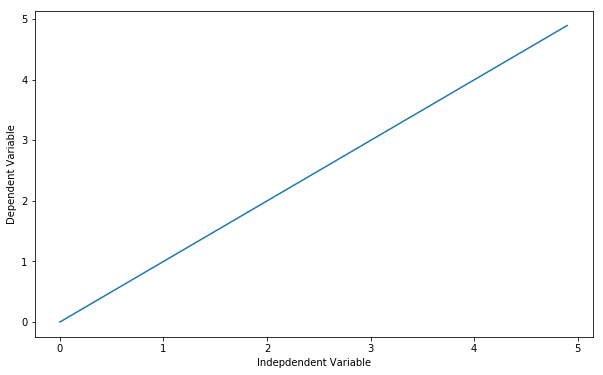

In [43]:
##You can adjust the slope and intercept to verify the changes in the graph
a=1
b=0

Y= a*X + b 

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [44]:
# -- Linear Reg with TF -- 

In [45]:
x_data = np.random.rand(100).astype(np.float32)

In [46]:
# use any kind of function, like y = 3x+2
y_data = x_data * 3 + 2 

# + gaussian noise
y_data = np.vectorize(lambda y: y + np.random.normal(loc = 0.0, scale = 0.1))(y_data)

In [47]:
#sample of data -- doesn't work
# zip(x_data, y_data) [0:5]

In [48]:
# initialize
a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a * x_data + b

In [49]:
# Loss fn - squared error
loss = tf.reduce_mean(tf.square(y - y_data))

In [50]:
# Define the training method of our Graph
learning_rate = 0.5
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [51]:
# initializing variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [52]:
# Do it!
train_data = []
print('learned values for [a, b] in y = x * a + b')
for step in range(100):
    evals = sess.run([train,a,b])[1:]
    if step % 5 == 0:  # print every 5th value
        print(step, evals)
        train_data.append(evals)


learned values for [a, b] in y = x * a + b
0 [1.0, 0.2]
5 [2.395082, 2.3136821]
10 [2.5468569, 2.2286005]
15 [2.660615, 2.1678407]
20 [2.7449493, 2.122792]
25 [2.807472, 2.0893948]
30 [2.8538241, 2.064635]
35 [2.8881881, 2.046279]
40 [2.9136643, 2.0326705]
45 [2.9325514, 2.0225816]
50 [2.9465535, 2.0151021]
55 [2.9569342, 2.0095572]
60 [2.9646301, 2.0054464]
65 [2.9703355, 2.0023987]
70 [2.9745655, 2.0001392]
75 [2.9777012, 1.9984641]
80 [2.9800262, 1.9972223]
85 [2.9817498, 1.9963017]
90 [2.9830277, 1.9956191]
95 [2.9839749, 1.9951129]


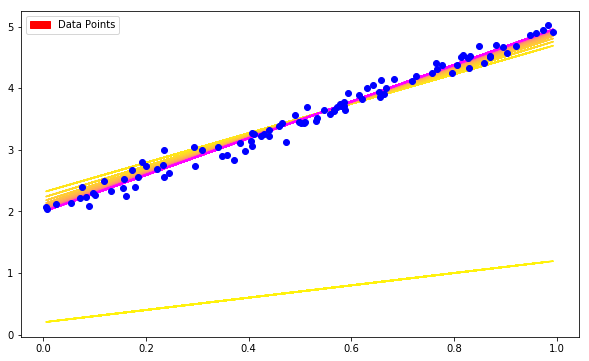

In [53]:
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(x_data, y_data, 'bo')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()